In [1]:
import os, sys

import numpy as np
import pandas as pd

from os.path import join

from library import SBKMeans, ErrorChecker
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pwd = os.getcwd()
data_dir = join(pwd, 'data/')
need_normalization = False
need_standardization = True
need_pca = True
filename = 'AirQualityUCI.csv'
datapath = join(data_dir, filename)
num_comps = 2
num_clusters = 5
num_iterations = 20

In [3]:
# f = open('data/data.csv')
# lines = f.read()
# print(type(lines))
# new_lines = ''
# for line in lines:
#     new_lines += str(line.encode('utf-8').strip())
# print(len(new_lines))

In [4]:
df = pd.read_csv(datapath, low_memory=False, encoding='utf-8')

In [5]:
print(len(df))

9357


In [6]:
print(df.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/3/2004  18.00.00     2.6         1360     150.0      11.9   
1  10/3/2004  19.00.00     2.0         1292     112.0       9.4   
2  10/3/2004  20.00.00     2.2         1402      88.0       9.0   
3  10/3/2004  21.00.00     2.2         1376      80.0       9.2   
4  10/3/2004  22.00.00     1.6         1272      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692       1268.0   
1            955      103          1174       92          1559        972.0   
2            939      131          1140      114          1555       1074.0   
3            948      172          1092      122          1584       1203.0   
4            836      131          1205      116          1490       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

In [7]:
print(df.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


In [8]:
columns = df.columns.tolist()
cols = columns
# cols = columns[1:]
# cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']
# cols = columns[:-1]
# cols = ['Passenger Count', 'Adjusted Passenger Count']
# cols = columns[1:]
cols = columns[2:]
df = df[cols]
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.fillna(0)
df = df.replace([-np.inf, np.inf], np.nan)
df = df.dropna()
df = df.loc[:, (df != 0).any(axis=0)]
print(len(df))
print(df.dtypes)

9357
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object


In [9]:
df = df.sample(
    frac=1.0,
    random_state=1,
)
df = df.reset_index(drop=True)

In [10]:
if need_normalization is True:
    normalizer = StandardScaler()
    tmp = normalizer.fit_transform(df)
    df = pd.DataFrame(tmp, columns=df.columns)
elif need_standardization is True:
    scaler = MinMaxScaler()
    tmp = scaler.fit_transform(df)
    df = pd.DataFrame(tmp, columns=df.columns)

In [11]:
X = df
if need_pca is True:
    pca = PCA(
        n_components=num_comps,
        svd_solver='auto',
    )
    X = pca.fit_transform(X)
else:
    X = X.to_numpy()

In [12]:
for x in X:
    for a in x:
        if np.isinf(a):
            print(x)

In [13]:
data = X
print(data[:5])
print(data.shape)

[[-0.04526882 -0.09777067]
 [ 0.14884422 -0.23581221]
 [-0.07847869 -0.09954947]
 [-0.14991385  0.07819651]
 [ 0.08742846 -0.23711976]]
(9357, 2)


In [14]:
models = ['sbkmeans', 'kmeans']

In [15]:
sbkmeans = SBKMeans(
    n_clusters=num_clusters,
    n_iters=num_iterations,
)

In [16]:
kmeans = KMeans(
    n_clusters=num_clusters,
    max_iter=num_iterations,
    init='k-means++',
    algorithm='auto',
#     n_init=50,
)

In [17]:
algorithms = {
    'kmeans': kmeans,
    'sbkmeans': sbkmeans,
}

[[ 0.08761871 -0.21858459]
 [-0.13067891  0.00535222]
 [-0.2106655   0.24074743]
 [ 1.42573556  0.27507831]
 [-0.02911552 -0.14844767]]
[4, 0, 4, 1, 0]
31083.945616380908


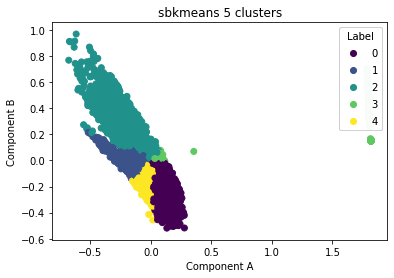

[[-0.33049761  0.39638553]
 [ 0.06877729 -0.24253923]
 [ 1.80692815  0.3476374 ]
 [-0.17329995  0.13160345]
 [-0.04158523 -0.05504659]]
[4 1 4 3 1]
44760.91438526715


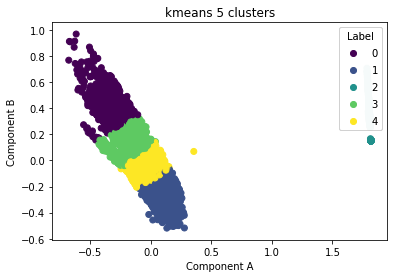

In [18]:
for model in models:
    algorithm = algorithms[model].fit(data)
    centers = algorithm.cluster_centers_
    print(centers)
    labels = algorithms[model].predict(data)
    print(labels[:5])
    error_checker = ErrorChecker(
        X=data,
        cluster_centers_=centers,
        labels_=labels,
    )
    dist_total = error_checker.potential_function()
    print(dist_total)
    fig, ax = plt.subplots()
    scatter = plt.scatter(
        X[:, 0],
        X[:, 1],
        c=labels,
    )
    handles, labels = scatter.legend_elements()
    legend = ax.legend(
        handles,
        labels,
        loc='upper right',
        title='Label',
    )
    ax.add_artist(legend)
    plt.title(model+' '+str(num_clusters)+ ' clusters')
    plt.xlabel('Component A')
    plt.ylabel('Component B')
    plt.show()